# Домашнее задание по ML 2022

Здадачи:
1) Проанализировать набор данных с фильмами и сериалами онлайн-кинотеатра Netflix.
2) Исследовать кассовых соборов на основании тестовой и обучающей выборки. 

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

# Считываем данные

Объем данных: 15480 элементов
Признаков: 29
Классов: 2
Состоит из следующих признаков:
1) Название фильма
2) Жанр
3) Язык оригинала
4) Теги для поиска
5) Фильм это или сериал
6) Оценки и рейтинг
7) Доступность в странах
8) Длительность
9) Режиссер
10) Сценарист
11) Актеры
12) Возрастной рейтинг
13) Средний балл по отзывам на IMDb
14) Средний балл по отзывам на Rotten Tomatoes
15) Средний балл по отзывам на Metacritic
16) Количество полученных наград
17) Количество номинаций на награды
18) Общие сборы
19) Дата выхода
20) Дата выхода на Netflix
21) Продюсерская компания
22) Количество отзывов на IMDb.
и тд

In [82]:
url = "https://raw.githubusercontent.com/TashirevIvan/MachineLearning/main/netflix-rotten-tomatoes-metacritic-imdb.csv"
data_raw = pd.read_csv(url)

In [83]:
data_raw.shape
data_raw.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon",...,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81336456,https://www.imdb.com/title/tt6132758,"Upon moving into a new place, a 20-something r...",1147.0,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNWRkMz...,NaN,NaN
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81078393,https://www.imdb.com/title/tt2023611,Inspired by her moms rebellious past and a con...,63.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BODYyNW...,NaN,NaN


Все признаки:

In [84]:
data_raw["Boxoffice"] = data_raw["Boxoffice"].apply(lambda l: float(str(l).replace(",", "").replace("$", "")))
data_raw.columns

Index(['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie',
       'Hidden Gem Score', 'Country Availability', 'Runtime', 'Director',
       'Writer', 'Actors', 'View Rating', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'Release Date',
       'Netflix Release Date', 'Production House', 'Netflix Link', 'IMDb Link',
       'Summary', 'IMDb Votes', 'Image', 'Poster', 'TMDb Trailer',
       'Trailer Site'],
      dtype='object')

In [107]:
data_raw.describe()

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,IMDb Votes,boolBoxoffice
count,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,1.548000e+04,1.548000e+04,15480.000000
mean,6.054606,6.510149,62.154264,56.947804,5.262209,9.445736,2.631514e+07,3.724431e+04,0.083204
std,2.112675,1.066909,17.474509,9.305129,11.810821,21.453523,3.787825e+07,1.176760e+05,0.276199
min,0.600000,1.000000,0.000000,5.000000,1.000000,1.000000,7.200000e+01,5.000000e+00,0.000000
25%,4.000000,6.000000,64.000000,57.000000,3.000000,5.000000,1.955107e+07,5.520000e+02,0.000000
50%,6.800000,6.600000,64.000000,57.000000,3.000000,5.000000,1.955107e+07,2.322000e+03,0.000000
75%,7.800000,7.200000,64.000000,57.000000,3.000000,5.000000,1.955107e+07,1.395125e+04,0.000000
max,9.800000,9.700000,100.000000,100.000000,300.000000,386.000000,6.593639e+08,2.354197e+06,1.000000


Добавим столбец, определяющий кассовые сборы. Среднее значение кассовых сборов ~45.000.000. За 1 обозначим фильмы и сериалы, преодолевшие средние сборы, 0 - в противном случае. 

In [85]:
data_raw["boolBoxoffice"] = np.where(data_raw["Boxoffice"] >= 45000000, 1, 0) 

Диаграмма рассеивания: зависимость отзывов на фильм/сериал от оценки фильма. 

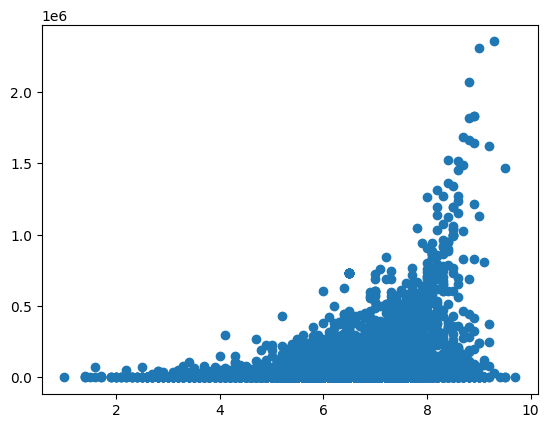

In [86]:
plt.scatter(data_raw['IMDb Score'], data_raw['IMDb Votes'])
pass

Чем больше оценка, тем больше отзывов.

Построим зависимость кассовых сборов от оценки фильма на платформе Rotten Tomatoes: 

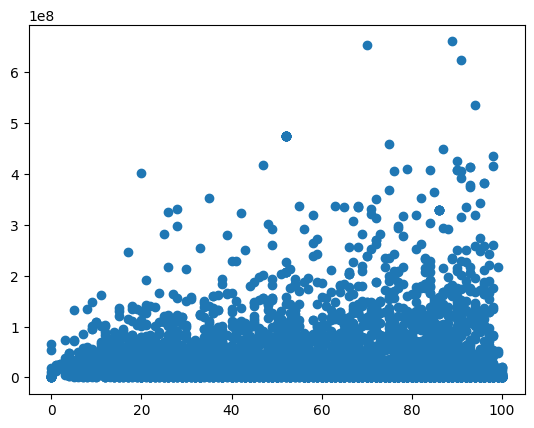

In [87]:
plt.scatter(data_raw['Rotten Tomatoes Score'], data_raw['Boxoffice'])

In [88]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=1000, replace=False)

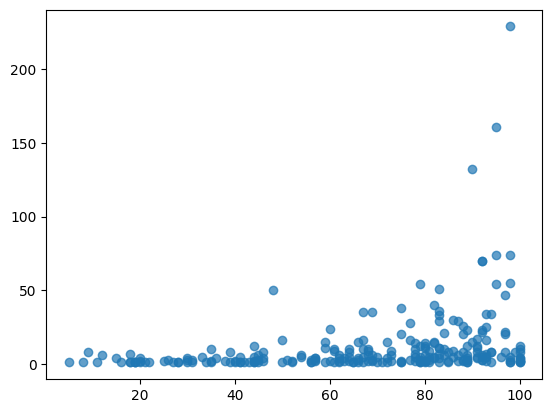

In [89]:

plt.scatter(data_raw.iloc[random_subset]['Rotten Tomatoes Score'], data_raw.iloc[random_subset]['Awards Received'],alpha=0.7)
pass

Видно, что высокий рейтинг чаще всего означает, что фильм лучше продался и получил много наград

# Построим диаграмму рассеивания

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


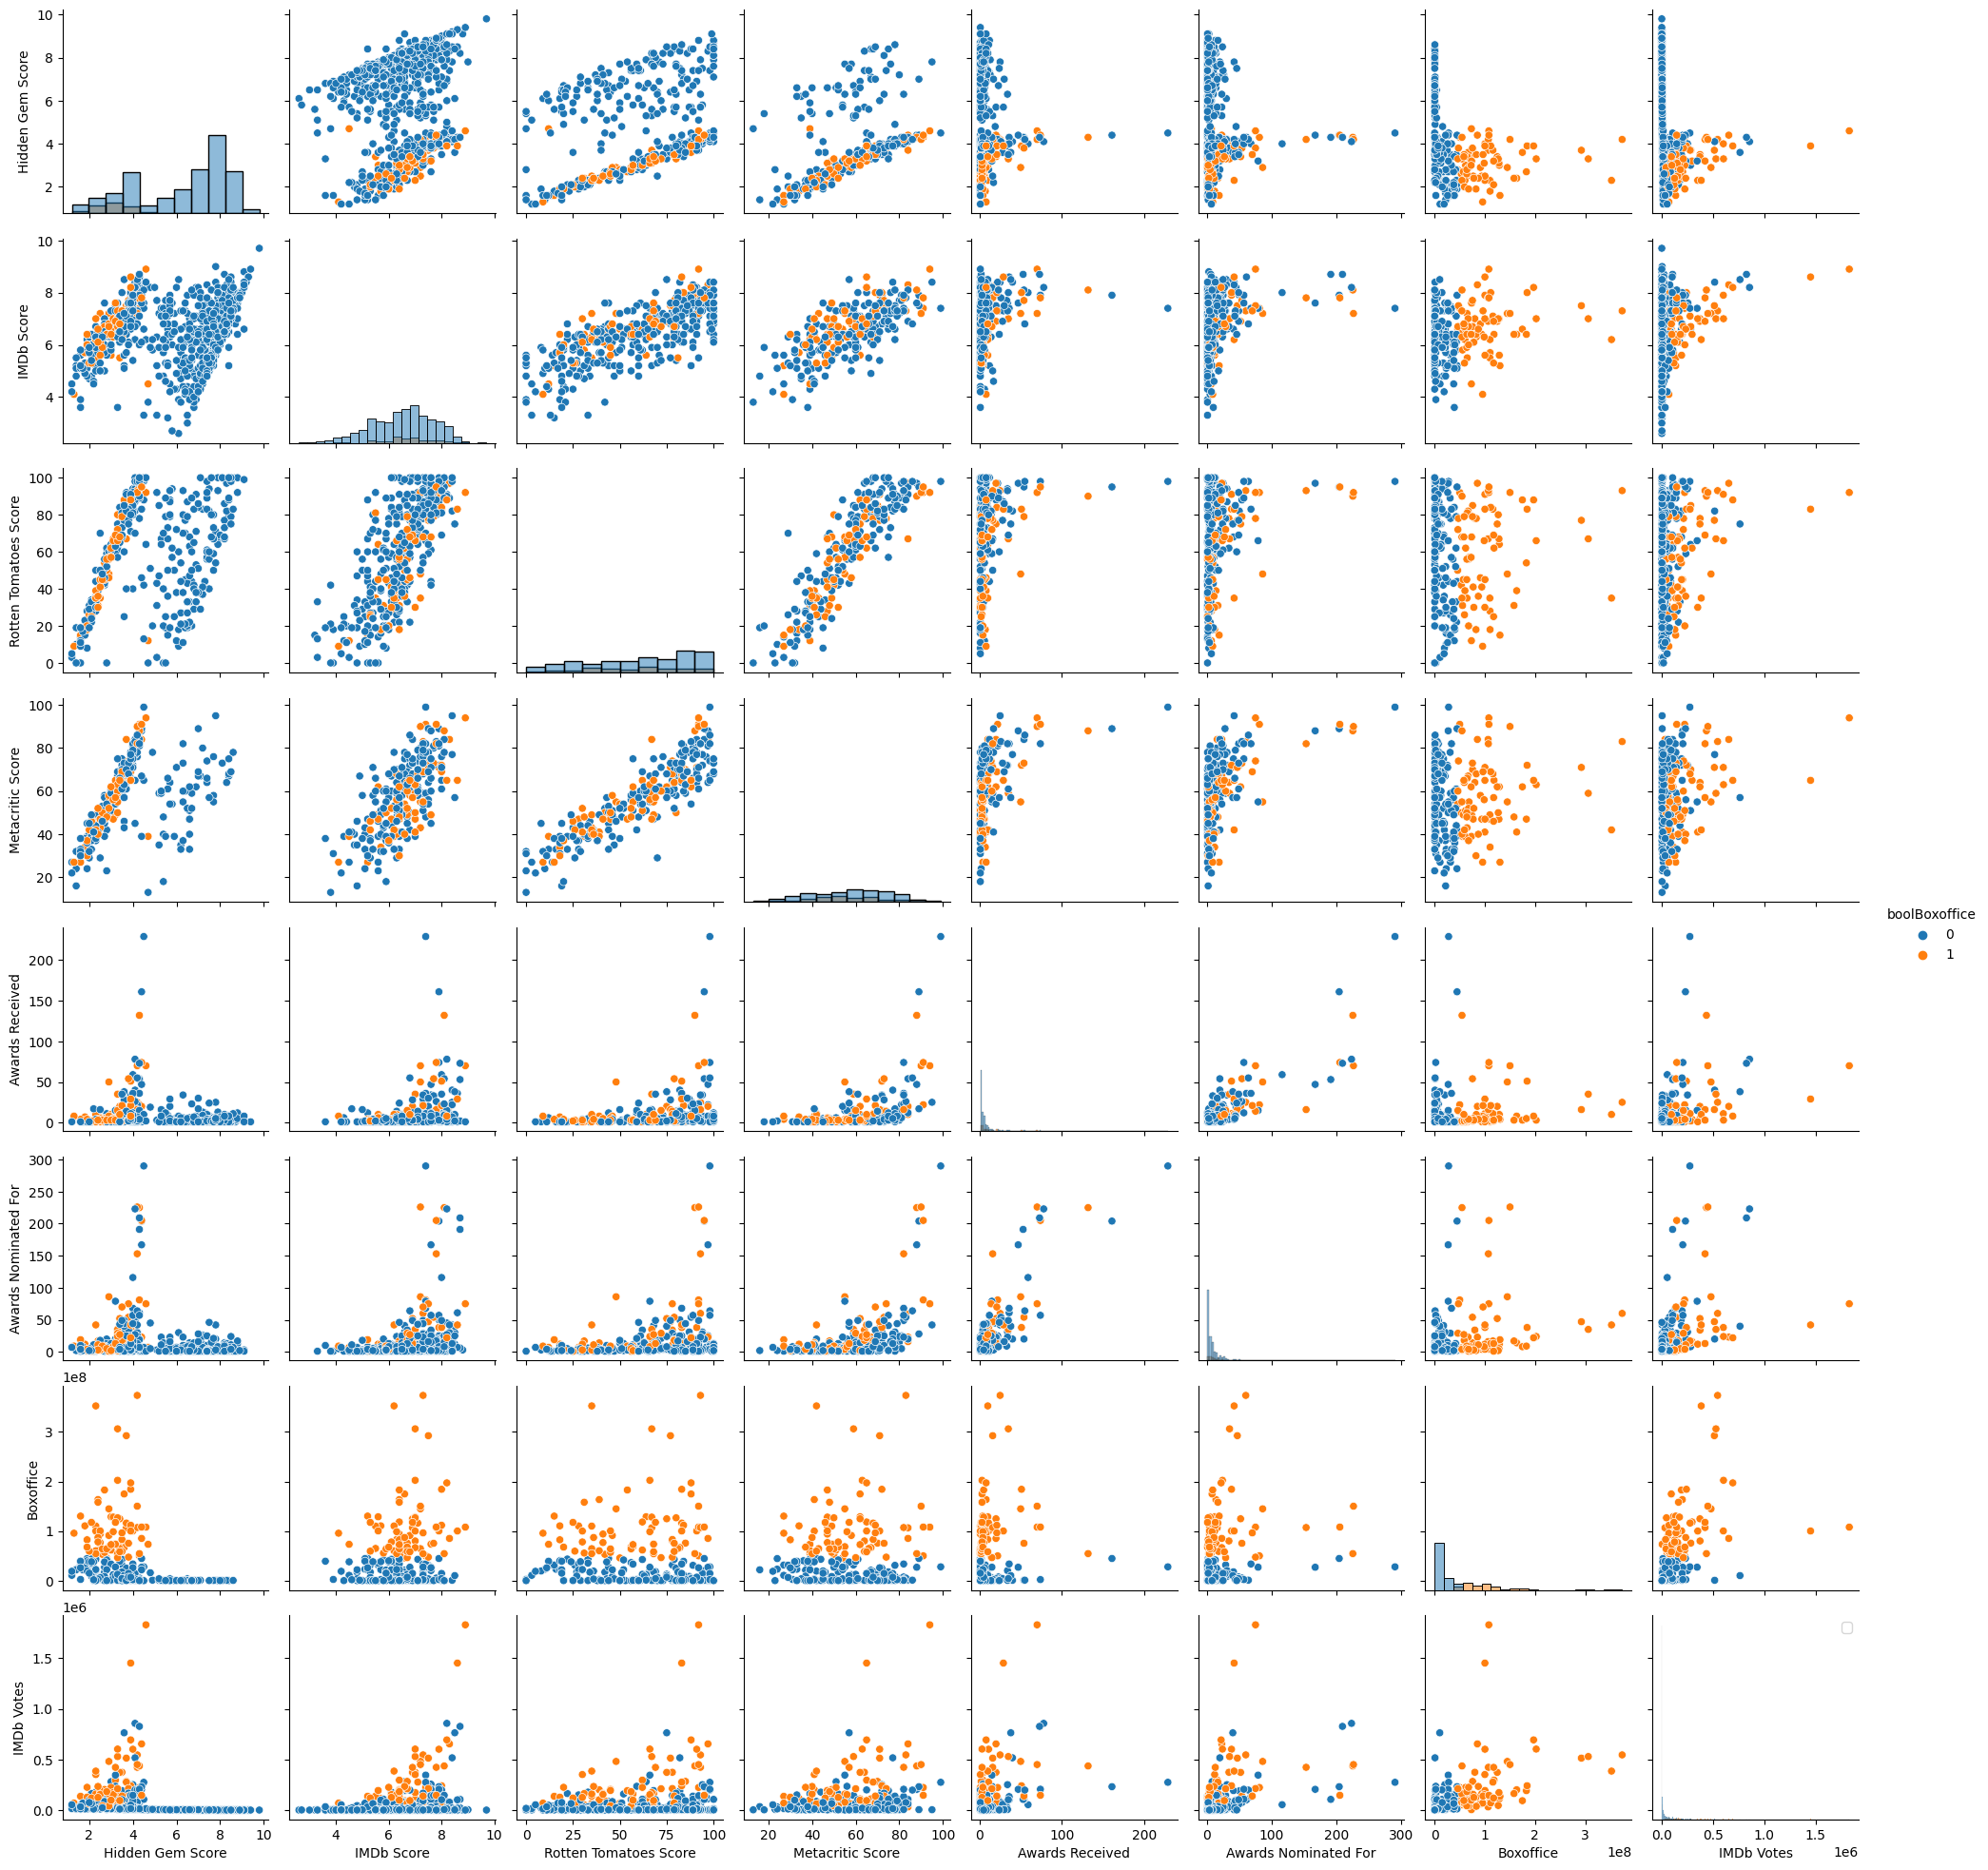

In [90]:
sns.pairplot(data_raw.iloc[random_subset], hue='boolBoxoffice', diag_kind='hist')
plt.legend()
pass

# Гистограмма рейтинга

C:\Users\cgvgv\AppData\Local\Temp\ipykernel_13840\1860753747.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_raw['Rotten Tomatoes Score'], bins=15)


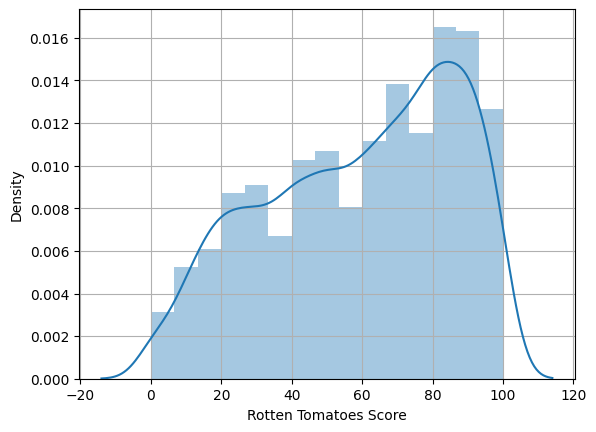

In [91]:
sns.distplot(data_raw['Rotten Tomatoes Score'], bins=15)
plt.grid()
pass

In [92]:
corr_mat = data_raw.corr()
corr_mat

C:\Users\cgvgv\AppData\Local\Temp\ipykernel_13840\3766106142.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = data_raw.corr()


,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,IMDb Votes,boolBoxoffice
Hidden Gem Score,1.000000,0.120373,0.397905,0.521470,-0.112787,-0.159500,-0.211815,-0.359540,-0.414361
IMDb Score,0.120373,1.000000,0.710922,0.717715,0.291142,0.289843,0.138257,0.229760,0.060333
Rotten Tomatoes Score,0.397905,0.710922,1.000000,0.903345,0.301380,0.309572,0.053706,0.181762,0.011154
Metacritic Score,0.521470,0.717715,0.903345,1.000000,0.431420,0.449726,0.061548,0.261384,0.025752
Awards Received,-0.112787,0.291142,0.301380,0.431420,1.000000,0.817262,0.193976,0.469818,0.173673
Awards Nominated For,-0.159500,0.289843,0.309572,0.449726,0.817262,1.000000,0.284885,0.497690,0.227144
Boxoffice,-0.211815,0.138257,0.053706,0.061548,0.193976,0.284885,1.000000,0.630301,0.708275
IMDb Votes,-0.359540,0.229760,0.181762,0.261384,0.469818,0.497690,0.630301,1.000000,0.566771
boolBoxoffice,-0.414361,0.060333,0.011154,0.025752,0.173673,0.227144,0.708275,0.566771,1.000000


# Матрица Корреляции

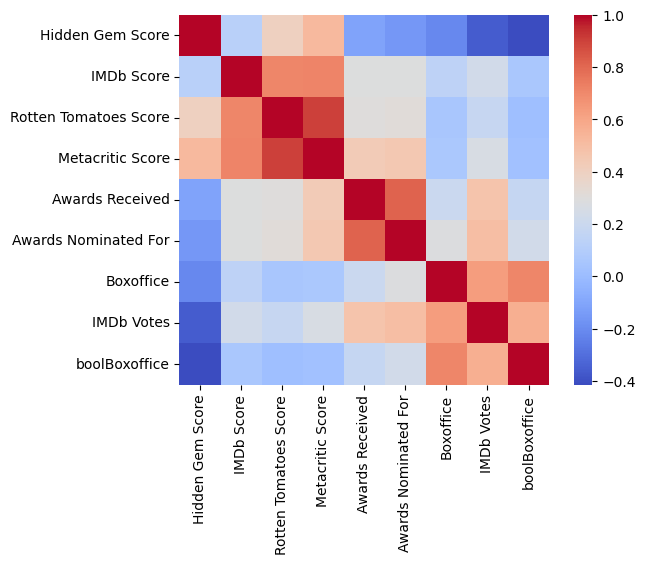

In [93]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

# Обработка пропущенных значений

In [94]:
data_raw.isna().sum()

Title                        0
Genre                     1710
Tags                        67
Languages                 1935
Series or Movie              0
Hidden Gem Score          2101
Country Availability        19
Runtime                      1
Director                  4708
Writer                    4330
Actors                    1925
View Rating               7024
IMDb Score                2099
Rotten Tomatoes Score     9098
Metacritic Score         11144
Awards Received           9405
Awards Nominated For      7819
Boxoffice                11473
Release Date              2107
Netflix Release Date         0
Production House         10331
Netflix Link                 0
IMDb Link                 2303
Summary                      9
IMDb Votes                2101
Image                        0
Poster                    3638
TMDb Trailer              8286
Trailer Site              8286
boolBoxoffice                0
dtype: int64

In [95]:
data_raw['Genre'].fillna(data_raw['Genre'].mode().iloc[0], inplace=True)
data_raw['Tags'].fillna(data_raw['Tags'].mode().iloc[0], inplace=True)
data_raw['Languages'].fillna(data_raw['Languages'].mode().iloc[0], inplace=True)
data_raw['Country Availability'].fillna(data_raw['Country Availability'].mode().iloc[0], inplace=True)
data_raw['Runtime'].fillna(data_raw['Runtime'].mode().iloc[0], inplace=True)
data_raw['Director'].fillna(data_raw['Director'].mode().iloc[0], inplace=True)
data_raw['Writer'].fillna(data_raw['Writer'].mode().iloc[0], inplace=True)
data_raw['Actors'].fillna(data_raw['Actors'].mode().iloc[0], inplace=True)
data_raw['View Rating'].fillna(data_raw['View Rating'].mode().iloc[0], inplace=True)
data_raw['Release Date'].fillna(data_raw['Release Date'].mode().iloc[0], inplace=True)
data_raw['Production House'].fillna(data_raw['Production House'].mode().iloc[0], inplace=True)
data_raw['IMDb Link'].fillna(data_raw['IMDb Link'].mode().iloc[0], inplace=True)
data_raw['TMDb Trailer'].fillna(data_raw['TMDb Trailer'].mode().iloc[0], inplace=True)
data_raw['Trailer Site'].fillna(data_raw['Trailer Site'].mode().iloc[0], inplace=True)
data_raw['Poster'].fillna(data_raw['Poster'].mode().iloc[0], inplace=True)

In [96]:
data_raw.fillna(data_raw.median(axis = 0), axis=0 , inplace=True)
data_raw.isna().sum()


C:\Users\cgvgv\AppData\Local\Temp\ipykernel_13840\2423314105.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_raw.fillna(data_raw.median(axis = 0), axis=0 , inplace=True)


Title                    0
Genre                    0
Tags                     0
Languages                0
Series or Movie          0
Hidden Gem Score         0
Country Availability     0
Runtime                  0
Director                 0
Writer                   0
Actors                   0
View Rating              0
IMDb Score               0
Rotten Tomatoes Score    0
Metacritic Score         0
Awards Received          0
Awards Nominated For     0
Boxoffice                0
Release Date             0
Netflix Release Date     0
Production House         0
Netflix Link             0
IMDb Link                0
Summary                  9
IMDb Votes               0
Image                    0
Poster                   0
TMDb Trailer             0
Trailer Site             0
boolBoxoffice            0
dtype: int64

# Обработка категориальных признаков

In [97]:
data = data_raw.loc[:, ['Title',  'Series or Movie',
       'Hidden Gem Score', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
        'Boxoffice', 'boolBoxoffice']].copy()

In [98]:
data['Series or Movie'] = data['Series or Movie'].astype('category')
data.head()

In [99]:
data['Series or Movie'] = pd.factorize(data['Series or Movie'])[0]
data.head()

,Title,Series or Movie,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Boxoffice,boolBoxoffice
0,Lets Fight Ghost,0,4.3,7.9,98.0,82.0,74.0,2122065.0,0
1,HOW TO BUILD A GIRL,1,7.0,5.8,79.0,69.0,1.0,70632.0,0
2,Centigrade,1,6.4,4.3,64.0,46.0,3.0,16263.0,0
3,ANNE+,0,7.7,6.5,64.0,57.0,1.0,19551067.0,0
4,Moxie,1,8.1,6.3,64.0,57.0,3.0,19551067.0,0


# Нормализация

In [100]:
data.drop(['Title'], axis=1, inplace = True)
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)
data.describe()

,Series or Movie,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Boxoffice,boolBoxoffice
count,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,1.548000e+04,15480.000000
mean,0.755620,6.054606,6.510149,62.154264,56.947804,5.262209,2.631514e+07,0.083204
std,0.429733,2.112675,1.066909,17.474509,9.305129,11.810821,3.787825e+07,0.276199
min,0.000000,0.600000,1.000000,0.000000,5.000000,1.000000,7.200000e+01,0.000000
25%,1.000000,4.000000,6.000000,64.000000,57.000000,3.000000,1.955107e+07,0.000000
50%,1.000000,6.800000,6.600000,64.000000,57.000000,3.000000,1.955107e+07,0.000000
75%,1.000000,7.800000,7.200000,64.000000,57.000000,3.000000,1.955107e+07,0.000000
max,1.000000,9.800000,9.700000,100.000000,100.000000,300.000000,6.593639e+08,1.000000


# Разбивка на обучающую и тестовую выборки

In [101]:
data_stand.columns
X = data_stand.drop(['IMDb Score',  'Boxoffice', 'boolBoxoffice'], axis=1)
y = data['boolBoxoffice']
X.head()


,Series or Movie,Hidden Gem Score,Rotten Tomatoes Score,Metacritic Score,Awards Received
0,-1.758349,-0.830514,2.051316,2.692300,5.819900
1,0.568679,0.447487,0.964018,1.295221,-0.360873
2,0.568679,0.163487,0.105625,-1.176534,-0.191537
3,-1.758349,0.778820,0.105625,0.005609,-0.360873
4,0.568679,0.968153,0.105625,0.005609,-0.191537


In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(11610, 3870)

# Метод kNN

для 5 соседей

In [103]:
from sklearn import neighbors
model = neighbors.KNeighborsClassifier()
model.fit(X, y)
knn_training_predict =  model.score(X_train, y_train)
knn_test_predict =  model.score(X_test, y_test)
print(" Train : {}, Test: {}. ".format(knn_training_predict, knn_test_predict))

err_train = np.mean(y_train != model.predict(X_train))
err_test  = np.mean(y_test  != model.predict(X_test))
print("Error: Train : {}, Test: {} ".format(err_train, err_test))

 Train : 0.9420327304048234, Test: 0.9418604651162791. 
Error: Train : 0.05796726959517657, Test: 0.05813953488372093 


Для 10 соседей

In [104]:
from sklearn import neighbors
model = neighbors.KNeighborsClassifier(n_neighbors = 10)
model.fit(X, y)
knn_training_predict =  model.score(X_train, y_train)
knn_test_predict =  model.score(X_test, y_test)
print(" Train : {}, Test: {}. ".format(knn_training_predict, knn_test_predict))

err_train = np.mean(y_train != model.predict(X_train))
err_test  = np.mean(y_test  != model.predict(X_test))

print("Error: Train : {}, Test: {} ".format(err_train, err_test))

 Train : 0.9294573643410853, Test: 0.9297157622739018. 
Error: Train : 0.07054263565891473, Test: 0.0702842377260982 


Для 30 соседей

In [105]:
from sklearn import neighbors
model = neighbors.KNeighborsClassifier(n_neighbors = 30)
model.fit(X, y)
knn_training_predict =  model.score(X_train, y_train)
knn_test_predict =  model.score(X_test, y_test)
print(" Train : {}, Test: {}. ".format(knn_training_predict, knn_test_predict))

err_train = np.mean(y_train != model.predict(X_train))
err_test  = np.mean(y_test  != model.predict(X_test))

print("Error: Train : {}, Test: {} ".format(err_train, err_test))

 Train : 0.9223083548664944, Test: 0.9263565891472868. 
Error: Train : 0.0776916451335056, Test: 0.07364341085271318 


# Вывод

При малом количестве соседей точность на обучающей выборке выше, при увеличении количества соседей точность ухудшается, но это позволит улучшить точность на тестовой выборке.